# Try to reproduce Graph 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, differential_evolution

In [2]:
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in dyne/cm converted to J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
gamma = 0   # Initial shear strain

In [3]:
# Modify energy per droplet calculation functions to return values in units of k_B*T
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2) / (k_B * T)

def F_ent(phi, phi_d):
    return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)

def F_elec(phi_d, phi):
    h = 2 * a * ((phi_c + phi_d) ** (1/3) * phi ** (-1/3) - 1)
    return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)

# Total free energy per droplet function in units of k_B*T
def F_tot(phi_d, phi):
    return F_int(phi_d) + F_ent(phi, phi_d) + F_elec(phi_d, phi)

In [4]:
def find_phi_d(phi):
    if phi <= phi_c:
        lower_bound = 0
    else:
        lower_bound = phi - phi_c
    bounds = [(lower_bound, phi_c)] 
    def F_tot_wrapper(phi_d):
        return  F_tot(phi_d[0], phi)
    result = differential_evolution(F_tot_wrapper, bounds=bounds)
    return result.x[0] if result.success else np.nan


# The relative percent graph

In [5]:
# Calculate values for plotting
phi_values = np.linspace(0.45, 0.85, 100)
phi_d_values = [find_phi_d(phi) for phi in phi_values]

phi_d_values[49:60]


/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_31361/2220882015.py:6: RuntimeWarning: divide by zero encountered in log
  return -3 * np.log(phi_c + phi_d - phi - alpha * gamma**2)
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_31361/2220882015.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * np.pi * (a**2) * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D) / (h * k_B * T)


[0.07986399664157556,
 0.08380051942098388,
 0.08773128471538164,
 0.09185680010854952,
 0.0956589952089609,
 0.09970342895456138,
 0.10363769545888948,
 0.10820349154390121,
 0.1116598352876763,
 0.11568521919073832,
 0.1197404609037904]

In [6]:
phi_values[10]

0.4904040404040404

In [7]:
# Calculate each energy contribution in units of k_B*T
F_int_values = [F_int(phi_d) for phi_d in phi_d_values]
F_ent_values = [F_ent(phi, phi_d) for phi, phi_d in zip(phi_values, phi_d_values)]
F_elec_values = [F_elec(phi_d, phi) for phi_d, phi in zip(phi_d_values, phi_values)]
F_tot_values = [F_int + F_ent + F_elec for F_int, F_ent, F_elec in zip(F_int_values, F_ent_values, F_elec_values)]

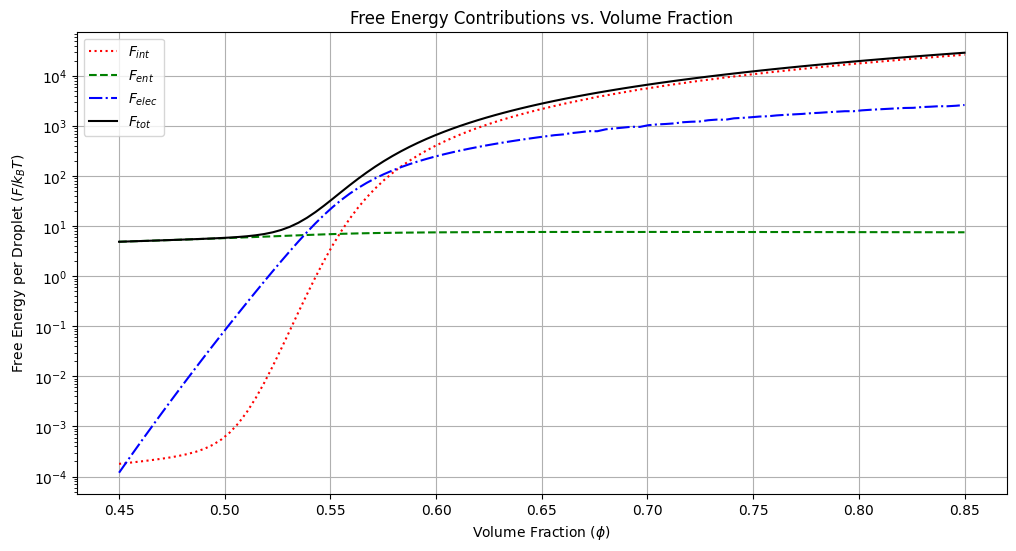

In [8]:
# Plotting the energies per droplet in units of k_B*T
plt.figure(figsize=(12, 6))
plt.plot(phi_values, F_int_values, label='$F_{int}$ ', linestyle='dotted', color='red')
plt.plot(phi_values, F_ent_values, label='$F_{ent}$ ', linestyle='dashed', color='green')
plt.plot(phi_values, F_elec_values, label='$F_{elec}$ ', linestyle='dashdot', color='blue')
plt.plot(phi_values, F_tot_values, label='$F_{tot}$ ', linestyle='solid', color='black')
plt.yscale('log')  # Log scale to match the figure from the paper
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Free Energy per Droplet ($F/k_B T$)')
plt.title('Free Energy Contributions vs. Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()

# The relative percent graph 10-b

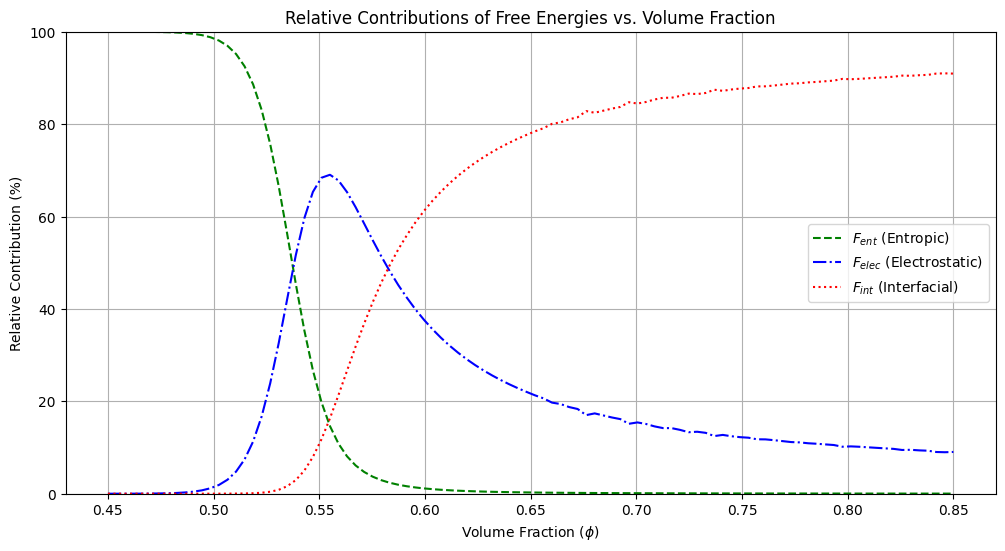

In [9]:
# Calculate the percentage contributions of each energy component to the total free energy
F_int_percent = [(F_int / F_tot) * 100 for F_int, F_tot in zip(F_int_values, F_tot_values)]
F_ent_percent = [(F_ent / F_tot) * 100 for F_ent, F_tot in zip(F_ent_values, F_tot_values)]
F_elec_percent = [(F_elec / F_tot) * 100 for F_elec, F_tot in zip(F_elec_values, F_tot_values)]

# Plotting the percent relative contributions as shown in Figure 10(b)
plt.figure(figsize=(12, 6))
plt.plot(phi_values, F_ent_percent, label='$F_{ent}$ (Entropic)', linestyle='dashed', color='green')
plt.plot(phi_values, F_elec_percent, label='$F_{elec}$ (Electrostatic)', linestyle='dashdot', color='blue')
plt.plot(phi_values, F_int_percent, label='$F_{int}$ (Interfacial)', linestyle='dotted', color='red')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Relative Contribution (%)')
plt.title('Relative Contributions of Free Energies vs. Volume Fraction')
plt.ylim(0, 100)  # Limiting y-axis to 0-100% to match the style of Figure 10(b)
plt.grid(True)
plt.legend()
plt.show()


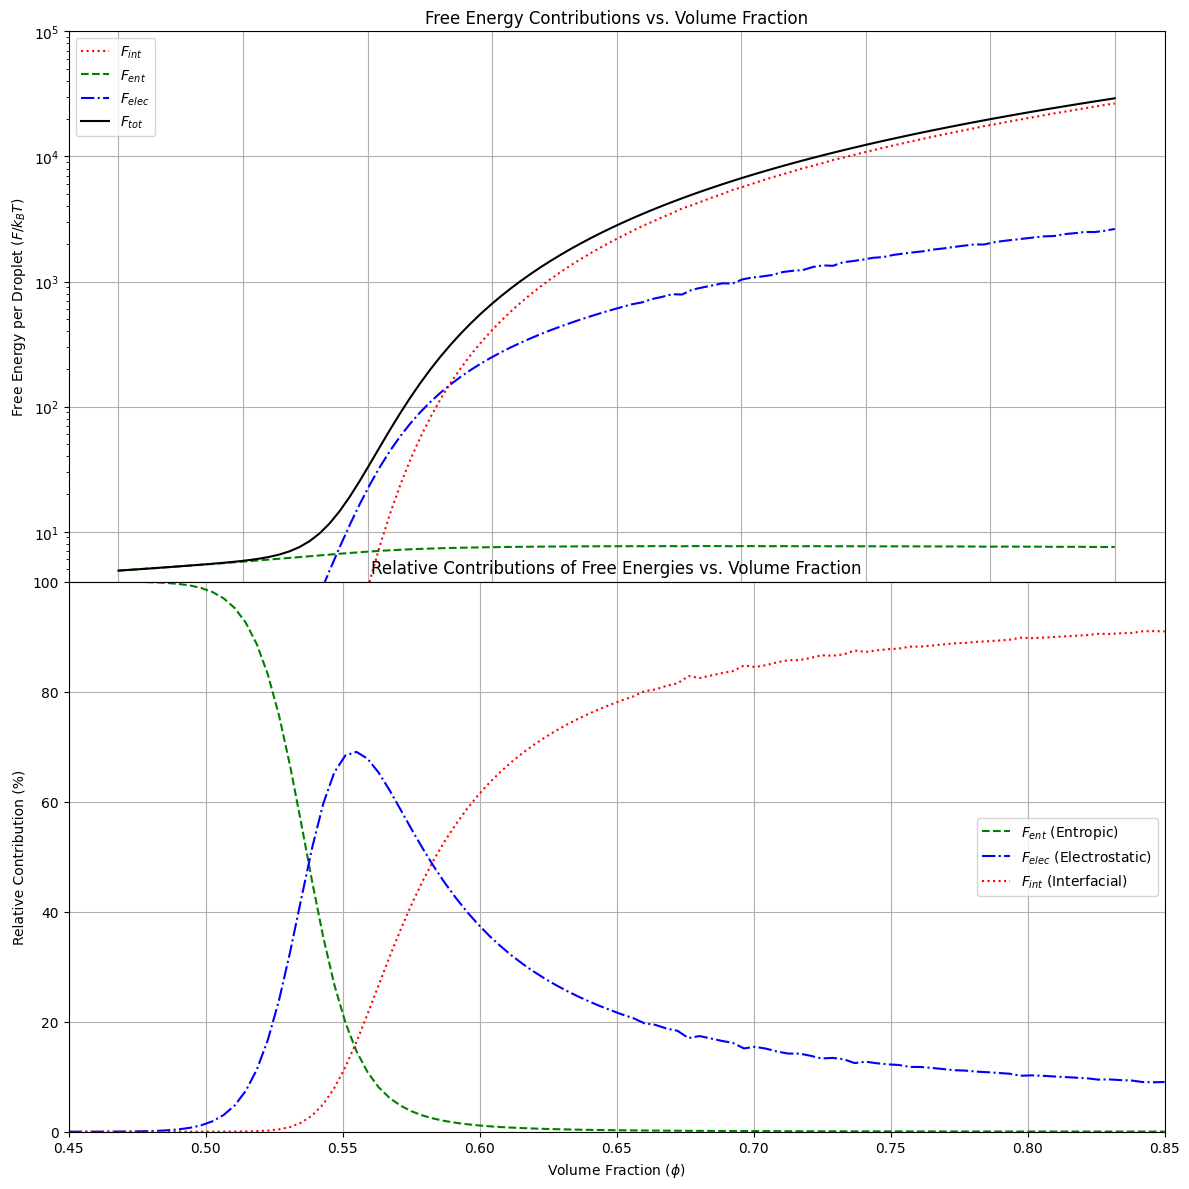

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 2], 'hspace': 0})

# 第一个子图（对应于提供的图片中 (a) 图）
ax1.plot(phi_values, F_int_values, label='$F_{int}$', linestyle='dotted', color='red')
ax1.plot(phi_values, F_ent_values, label='$F_{ent}$', linestyle='dashed', color='green')
ax1.plot(phi_values, F_elec_values, label='$F_{elec}$', linestyle='dashdot', color='blue')
ax1.plot(phi_values, F_tot_values, label='$F_{tot}$', linestyle='solid', color='black')
ax1.set_yscale('log')
ax1.set_ylim([4, 10**5])
ax1.set_ylabel('Free Energy per Droplet ($F/k_B T$)')
ax1.set_title('Free Energy Contributions vs. Volume Fraction')
ax1.legend()
ax1.grid(True)

# 隐藏第一个子图的 x 轴标签以便与下方子图共享
ax1.tick_params(labelbottom=False)

# 第二个子图（对应于提供的图片中 (b) 图）
ax2.plot(phi_values, F_ent_percent, label='$F_{ent}$ (Entropic)', linestyle='dashed', color='green')
ax2.plot(phi_values, F_elec_percent, label='$F_{elec}$ (Electrostatic)', linestyle='dashdot', color='blue')
ax2.plot(phi_values, F_int_percent, label='$F_{int}$ (Interfacial)', linestyle='dotted', color='red')
ax2.set_xlabel('Volume Fraction ($\\phi$)')
ax2.set_xlim([0.45, 0.85])
ax2.set_ylabel('Relative Contribution (%)')
ax2.set_ylim(0, 100)  # y轴限制在0-100%范围
ax2.set_title('Relative Contributions of Free Energies vs. Volume Fraction')
ax2.grid(True)
ax2.legend()

# 调整布局，使得两个子图紧密排列
plt.tight_layout()
plt.subplots_adjust(hspace=0)  # 减少子图之间的垂直空隙

plt.show()

# Try to reproduce Graph 11-a

In [10]:
V_drop = (4/3) * np.pi * a**3

## int

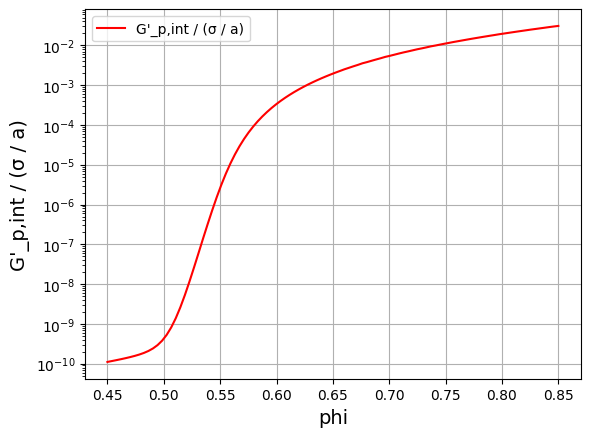

In [11]:
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * a**2 * phi_d**2

# calculate G'_p,int / (σ / a)
def G_p_int_over_sigma_a(phi, phi_d):
    F_int_value = F_int(phi_d)
    G_p_int_value = (phi / V_drop) * F_int_value
    return G_p_int_value / (sigma / a)

G_p_int_values = [G_p_int_over_sigma_a(phi, phi_d_star) for phi, phi_d_star in zip(phi_values, phi_d_values)]

plt.plot(phi_values, G_p_int_values, label="G'_p,int / (σ / a)", color='red')
plt.yscale('log')
plt.xlabel('phi', fontsize=14)
plt.ylabel("G'_p,int / (σ / a)", fontsize=14)
# plt.title("G'_p,int as a Function of φ (Normalized by σ / a)", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

## ent

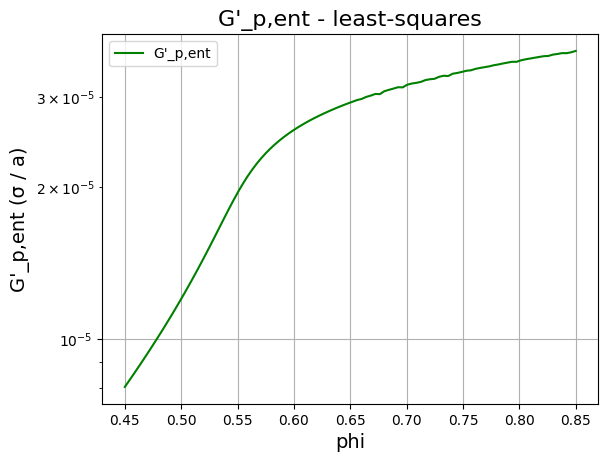

In [12]:
gamma_values = np.linspace(0, 0.01, 100)  

def F_ent(phi_d, phi, gamma):
    return -3 * k_B * T * np.log(phi_c + phi_d - phi - alpha * gamma**2)
def curvature_of_F_ent(phi_d, phi):
    F_values = [F_ent(phi_d, phi, g) for g in gamma_values]
    p = np.polyfit(gamma_values, F_values, 2)  
    return p[0]  

def G_p_ent(phi, phi_d):
    curvature = curvature_of_F_ent(phi_d, phi)
    return (phi / (V_drop)) * curvature / (sigma / a)

G_p_ent_values = [G_p_ent(phi, phi_d) for phi, phi_d in zip(phi_values, phi_d_values)]

plt.plot(phi_values, G_p_ent_values, label="G'_p,ent", color='green')
plt.yscale('log')
plt.xlabel('phi', fontsize=14)
plt.ylabel("G'_p,ent (σ / a)", fontsize=14)
plt.title("G'_p,ent - least-squares", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [13]:
def G_p_ent(phi, phi_d):
    return (phi / (V_drop)) *( (6 * k_B * T * alpha * (phi_c + phi_d - phi))  / (phi_c + phi_d - phi)**2 ) / (sigma / a)

G_p_ent_values = [G_p_ent(phi, phi_d) for phi, phi_d in zip(phi_values, phi_d_values)]

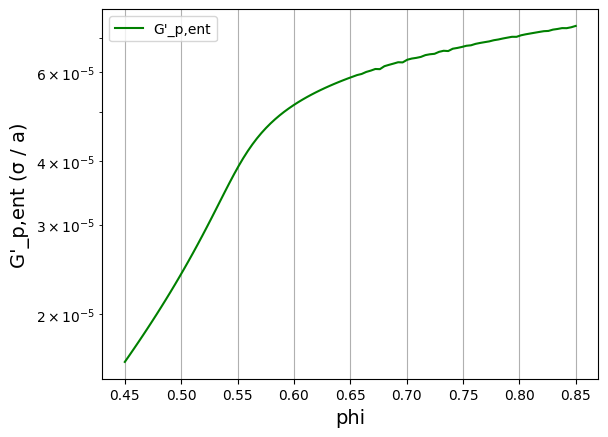

In [14]:
plt.plot(phi_values, G_p_ent_values, label="G'_p,ent", color='green')
plt.yscale('log')
plt.xlabel('phi', fontsize=14)
plt.ylabel("G'_p,ent (σ / a)", fontsize=14)
# plt.title("G'_p,ent as a Function of φ", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
gamma_values = np.linspace(0, 0.01, 100)  

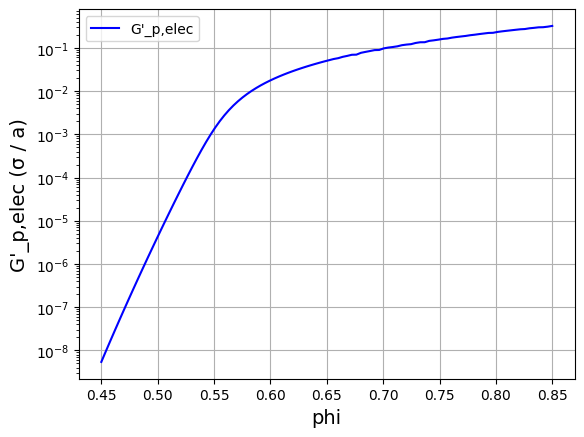

In [16]:
def h(phi, phi_d, gamma):
    return 2 * phi_c**(1/3) * a * (phi**(-1/3) - (phi_c + phi_d - alpha * gamma**2)**(-1/3))


def F_elec(phi_d, phi, gamma):
    h_value = h(phi, phi_d, gamma)
    return 2 * np.pi * a**2 * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h_value / lambda_D) / h_value

# Use least squares fitting to find the second derivative (curvature)
def curvature_of_F_elec(phi_d, phi):
    F_values = [F_elec(phi_d, phi, g) for g in gamma_values]
    p = np.polyfit(gamma_values, F_values, 2) 
    return p[0]  

def G_p_elec(phi, phi_d):
    curvature = curvature_of_F_elec(phi_d, phi)
    return (phi / (V_drop)) * curvature / (sigma / a)  # Normalize wrt σ / a


G_p_elec_values = [G_p_elec(phi, phi_d) for phi, phi_d in zip(phi_values, phi_d_values)]

plt.plot(phi_values, G_p_elec_values, label="G'_p,elec", color='blue')
plt.yscale('log')
plt.xlabel('phi', fontsize=14)
plt.ylabel("G'_p,elec (σ / a)", fontsize=14)
# plt.title("G'_p,elec as a Function of φ", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

## Total

In [17]:
G_p_tot_values = [G_p_int + G_p_ent + G_p_elec for G_p_int, G_p_ent, G_p_elec in zip(G_p_int_values, G_p_ent_values, G_p_elec_values)]

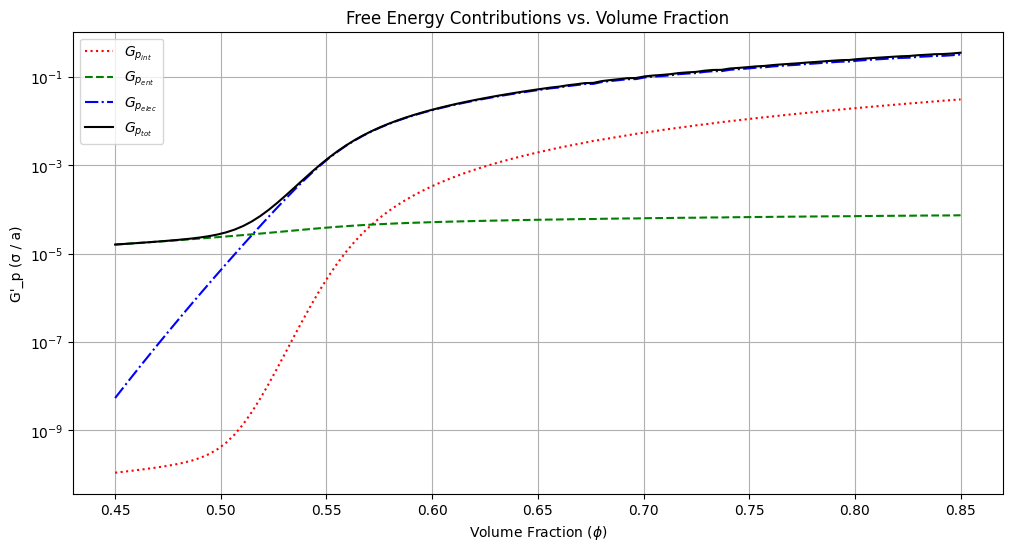

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(phi_values, G_p_int_values, label='$G_{p_{int}}$ ', linestyle='dotted', color='red')
plt.plot(phi_values, G_p_ent_values, label='$G_{p_{ent}}$ ', linestyle='dashed', color='green')
plt.plot(phi_values, G_p_elec_values, label='$G_{p_{elec}}$ ', linestyle='dashdot', color='blue')
plt.plot(phi_values, G_p_tot_values, label='$G_{p_{tot}}$ ', linestyle='solid', color='black')
plt.yscale('log')  # Log scale to match the figure from the paper
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel("G'_p (σ / a)")
plt.title('Free Energy Contributions vs. Volume Fraction')
plt.legend()
plt.grid(True)
plt.show()

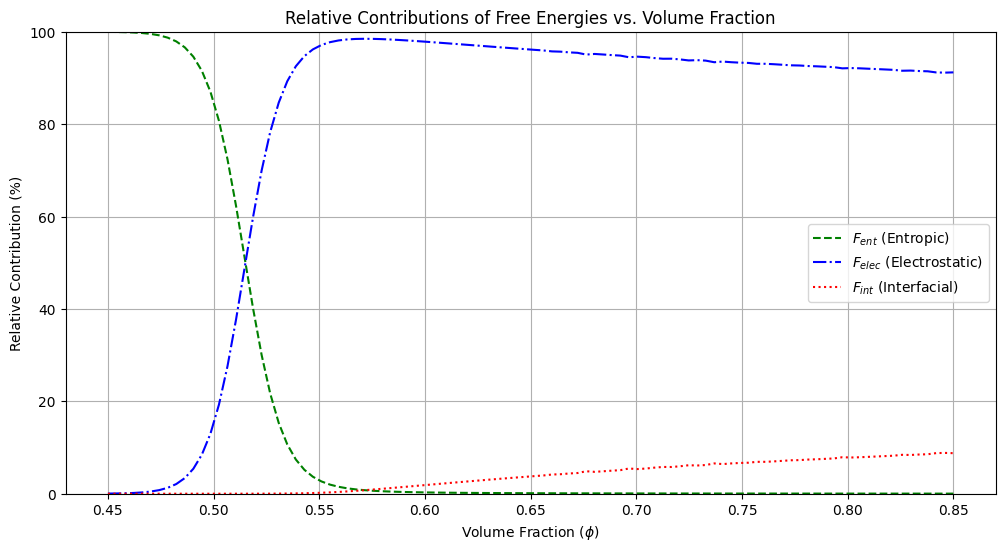

In [19]:
# Calculate the percentage contributions of each energy component to the total free energy
G_p_int_percent = [(G_p_int / G_p_tot) * 100 for G_p_int,G_p_tot in zip(G_p_int_values, G_p_tot_values)]
G_p_ent_percent = [(G_p_ent / G_p_tot) * 100 for G_p_ent, G_p_tot in zip(G_p_ent_values, G_p_tot_values)]
G_p_elec_percent = [(G_p_elec / G_p_tot) * 100 for G_p_elec, G_p_tot in zip(G_p_elec_values, G_p_tot_values)]

# Plotting the percent relative contributions as shown in Figure 10(b)
plt.figure(figsize=(12, 6))
plt.plot(phi_values, G_p_ent_percent, label='$F_{ent}$ (Entropic)', linestyle='dashed', color='green')
plt.plot(phi_values, G_p_elec_percent, label='$F_{elec}$ (Electrostatic)', linestyle='dashdot', color='blue')
plt.plot(phi_values, G_p_int_percent, label='$F_{int}$ (Interfacial)', linestyle='dotted', color='red')
plt.xlabel('Volume Fraction ($\\phi$)')
plt.ylabel('Relative Contribution (%)')
plt.title('Relative Contributions of Free Energies vs. Volume Fraction')
plt.ylim(0, 100)  # Limiting y-axis to 0-100% to match the style of Figure 10(b)
plt.grid(True)
plt.legend()
plt.show()